# CS530 Data Mining Homework 5

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')

#### Question 1

a. Read in the dataset ‘zip.train’ using the pandas ‘read_csv’ function. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function to find the right parameters to properly read in this dataset. You might want to open the dataset in a text editor to inspect its structure.

In [3]:
# Your code goes here
data = pd.read_csv('zip.train', sep= ' ', index_col = 0, header = None)
newdata = data.iloc[:,:-1]
newdata.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,,,,,,,,,,,,,,,,,,,,,
6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


b. This dataset contains handwritten digits from 0 to 9. The first column contains the label (0-9) of each record. Each digit has 256 columns, each representing a pixel in a 16x16 image. Choose one row, use the ‘reshape’ function in numpy to reshape the row vector to 16x16, and use matplotlib to visualize the image.

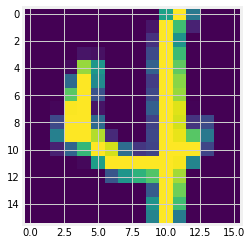

In [4]:
# Your code goes here
r = newdata.iloc[2].values
row = r.reshape(16,16)
img = plt.imshow(row)

c. Select a subset of the dataset with one digit of your choice. Perform PCA on the subset and show the percentage of variance you keep with 2 principle components. (You might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) to see how to properly fit and transform the dataset using scikit-learn.)

In [5]:
# Your code goes here
from sklearn.decomposition import PCA
r = newdata.loc[6.0]
print(r)
pca = PCA(n_components=2)
#pca.fit(r)
#PCA(n_components=2)
star = pca.fit_transform(r)
print(star)
#percentage of var
print(pca.explained_variance_ratio_)

     1    2    3    4    5      6      7      8      9      10   ...    247  \
0                                                                ...          
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.631  0.862 -0.167  ...  0.304   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.397  0.983 -0.535 -1.000 -1.000  ...  0.803   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0.270  0.973  ... -0.041   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.701  0.708 -0.722  ... -0.479   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000  0.023  0.782  ... -0.727   
..   ...  ...  ...  ...  ...    ...    ...    ...    ...    ...  ...    ...   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0.290  0.972  ...  1.000   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.599  0.309  1.000  ...  0.428   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -0.981 -0.572  0.687  0.592  ...  0.993   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -0.921 -0.249  0.460  0.826  ... -0.894   
6.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0

In [6]:
pc_df = pd.DataFrame(data = star, columns = ['Principal Component 1', 'Principal Component 2'])

d. Plot a scatter plot of the data with the first two principal components. Find 25 records as is shown in the figure below (the red circles approximately constitute a 5x5 grid). Reshape them into images and plot them accordingly (as 5x5 [subplots](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.subplot.html)).

![plot]('plot.png')

In [46]:
from scipy.spatial import distance

# fig = plt.figure(figsize = (7,7))
# ax = fig.add_subplot(111)

#creating arbitrary 5x5 matrix
myboy1 = np.linspace(-5,8,5)
rangito = np.linspace(-4,4,5)
rows = []
for i in myboy1:
    for j in rangito:
        row = [i,j]
        rows.append(row)
x_val = np.delete(rows, 1, 1)
y_val = np.delete(rows, 0, 1)
rows_df = pd.DataFrame(data = rows, columns = ['X-value', 'Y-value'])

#reorganizing arrays to display values
pc_points = pc_df.values
rows_points = rows_df.values
    
#getting euclidean dist and minimum indices
mins = []
dis_of_mins = []
for arb in (rows_points):
    dis = np.array([])
    for pt in (pc_points):
        distances = distance.euclidean(pt,arb)
        dis = np.append(dis,distances)
    min = np.argmin(dis)
    mins.append(min)
    dis_mins = dis[min]
    dis_of_mins.append(dis_mins)


#organizing into dataframe
minpoints = []
for i in mins:
    minpoints.append(pc_points[i])
    
dic = {'Mins':mins,'Distances':dis_of_mins}
ind_and_dis = pd.DataFrame(data = dic, columns = ['Mins', 'Distances'])
#ind_and_dis.head()

# #plotting
# ax.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'], s=80, c = 'black', marker=(5, 1))
# ax.scatter(x_val,y_val, s=80, c = 'blue', marker=(5, 1))
# minx, miny = np.array(minpoints).T
# ax.scatter(minx, miny, s=80, c = 'red', marker=(5, 1))
# #print(minpoints)
# ax.set_xlim(-10,15)
# ax.set_ylim(-8,8)

In [63]:
array = r.values
#array.shape
digits = array[dic['Mins'],:]
digits

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [9]:
digits_reshape = digits.reshape([25,16,16])

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


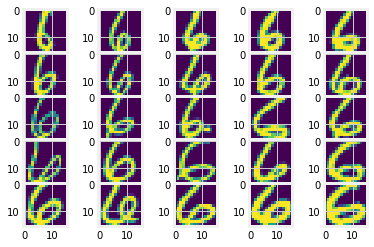

In [10]:
grid = plt.GridSpec(5,5, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(5):
    for j in range(5):
        plt.subplot(grid[i,j])
        indexes = 5*i + j
        my_plot = plt.imshow(digits_reshape[indexes,:,:])

e. Discuss what you see in the 5x5 image plot. What do you think are the features that the two principle components are capturing?

In [11]:
#There are obvious trends visible in the 5x5 image plot above.  For one, the x-axis stretch of the imaged number 
#increases as one moves their eyes from the top to the bottom. Secondly, the thickness of the imaged number 
#increases as well, as one moves their eyes from the top to the bottom.  #Thirdly, one can see a slight increase
#in the "curliness" (and slight rotation) of the imaged number as one moves their eyes horizontally.  
#Therefore, one can conclude that the features the two principle components are capturing include x-axis stretch, 
#thickness, and curliness.